In [1]:
import imageio as igio
import matplotlib.pyplot as plt
import numpy as np

In [93]:

def my_fun( filename='frame0.jpg', method='1' ):
#     im_read =igio.imread(filename)
    
    if( method == 1 ):
        im_read =igio.imread(filename)
        print('Limearization')
        im_shape = im_read.shape
        im_size = im_shape[0]*im_shape[1]
        
        counter = np.zeros([1,2])
        counter[0,0] = 0
        counter[0,1] = im_size
        
        T_i = 125
        T = 0
        c = 0
        
        channel = 0
        while( np.abs(T_i - T) > 0.5 ):
            print(str(T_i) + ' - ' + str(T))
            im_read =igio.imread(filename)
            im = im_read
            counter = np.zeros([1,2])
            counter_pix = np.zeros([1,2])
            for i in range(1,im_shape[0]):
                for j in range(1,im_shape[1]):
                    if( im[i,j] <= T ):
                        counter_pix[0,0] += im[i,j]
                        im[i,j] = 0
                        counter[0,0] += 1
                    else:
                        counter_pix[0,1] += im[i,j]
                        im[i,j] = 1
                        counter[0,1] += 1
            
            G1 = counter_pix[0,0] / counter[0,0]
            G2 = counter_pix[0,1] / counter[0,1]
            T = T_i
            T_i = 0.5*(G1+G2)
            print(str(T_i) + ' * ' + str(T))
            
            print( str(G1) + ' ' + str(G2), end = '\n' )
            plt.figure(figsize = (10,10))
            plt.imshow(im[:,:]*255, cmap = plt.get_cmap(name = 'gray'))
            plt.colorbar()
            
            c += 1
    
    if( method == 2 ):
        im_read = filename
        print(im_read)
        
        im = im_read
        im_shape = im_read.shape
        print(im_shape)
        
        im_vector = np.zeros([1,im_shape[0]*im_shape[1]]) #vectorized of original image
        im_vector1 = np.zeros([1,im_shape[0]*im_shape[1]]) #temporal
        print(im_shape[0]*im_shape[1])
        
        im_vector2 = np.zeros([1,im_shape[0]*im_shape[1]+2]) #vectorized of original image with pos -1 +1 
        im_vector3 = np.zeros([1,im_shape[0]*im_shape[1]+2]) #temporal
        print(im_shape[0]*im_shape[1]+2)
        
        im_vector3[0,0] = im_read[im_shape[0]-1,im_shape[1]-1] 
        im_vector3[0,im_shape[0]*im_shape[1]+2 - 1] = im_read[0,0]
        
        idx = 0
        channel = 0
        for i in range(0,im_shape[0]):
            for j in range(0,im_shape[1]):
                im_vector[0,idx] = im_read[i,j]
                idx += 1
                
        print(im_vector)
        im_vector3[0,1:im_shape[0]*im_shape[1]+1] = im_vector[0,:]
        print(im_vector3)
                    
        filter = [0.5,0.3,0.2]
        print(filter)
        
        for i in range(1,im_shape[0]*im_shape[1]+2-1):
            im_vector2[0,i-1] = im_vector3[0,i-1] * filter[0] + im_vector3[0,i] * filter[1] + im_vector3[0,i+1] * filter[1]
            print( str(im_vector3[0,i-1])+'*'+str(filter[0])+' + '+str(im_vector3[0,i])+'*'+str(filter[1])+' + '+str(im_vector3[0,i+1])+'*'+str(filter[1])+' = '+str(im_vector2[0,i-1]))
        print(im_vector2)
#         im_vector = im_vector2
        
        idx = 0
        for i in range(0,im_shape[0]):
            for j in range(0,im_shape[1]):
                im_read[i,j] = im_vector2[0,idx]
                idx += 1
        
        plt.figure(figsize = (10,10))        
        plt.imshow(im[:,:], cmap = plt.get_cmap(name = 'gray'))
        plt.colorbar()
        
        plt.figure(figsize = (10,10))
        plt.imshow(im_read[:,:]*255, cmap = plt.get_cmap(name = 'gray'))
        plt.colorbar()

In [94]:
I = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(I)
II = np.zeros([3,3])
print(II)
II = np.array(I)
print(II)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)
9
11
[[1. 2. 3. 4. 5. 6. 7. 8. 9.]]
[[9. 1. 2. 3. 4. 5. 6. 7. 8. 9. 1.]]
[0.5, 0.3, 0.2]
9.0*0.5 + 1.0*0.3 + 2.0*0.3 = 5.3999999999999995
1.0*0.5 + 2.0*0.3 + 3.0*0.3 = 2.0
2.0*0.5 + 3.0*0.3 + 4.0*0.3 = 3.0999999999999996
3.0*0.5 + 4.0*0.3 + 5.0*0.3 = 4.2
4.0*0.5 + 5.0*0.3 + 6.0*0.3 = 5.3
5.0*0.5 + 6.0*0.3 + 7.0*0.3 = 6.4
6.0*0.5 + 7.0*0.3 + 8.0*0.3 = 7.5
7.0*0.5 + 8.0*0.3 + 9.0*0.3 = 8.6
8.0*0.5 + 9.0*0.3 + 1.0*0.3 = 6.999999999999999
[[5.4 2.  3.1 4.2 5.3 6.4 7.5 8.6 7.  0.  0. ]]


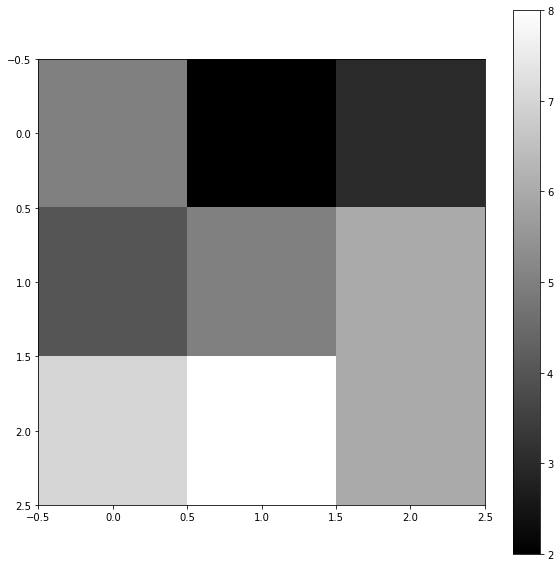

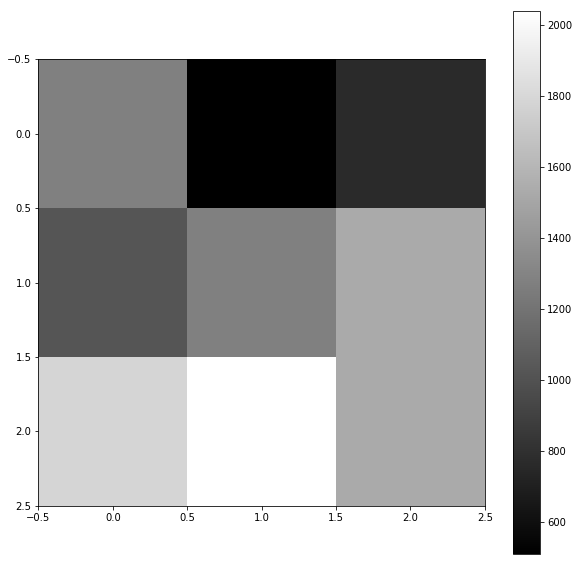

In [95]:
my_fun(II, method=2)